# Анализ Данных

Данные используемые в данном notebook содержат в себе информацию о проданных автомобилях - их основных характеристиках, а также цены их реализации. На основе данной информации будет построена модель, которая наиболее точно сможет предсказать цены на любые будущие потенциальные продажи, основываясь на характеристиках автомобиля.

In [7]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as  mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [8]:
# создание объекта DataFrame
df = pd.read_csv('CarPrice.csv')

In [9]:
# просмотр первых трех строк 
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [10]:
# информация о количестве строк и столбцов в DataFrame
df.shape

(205, 26)

In [11]:
# общая информация о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# проверка на наличие отсутствующих данных
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

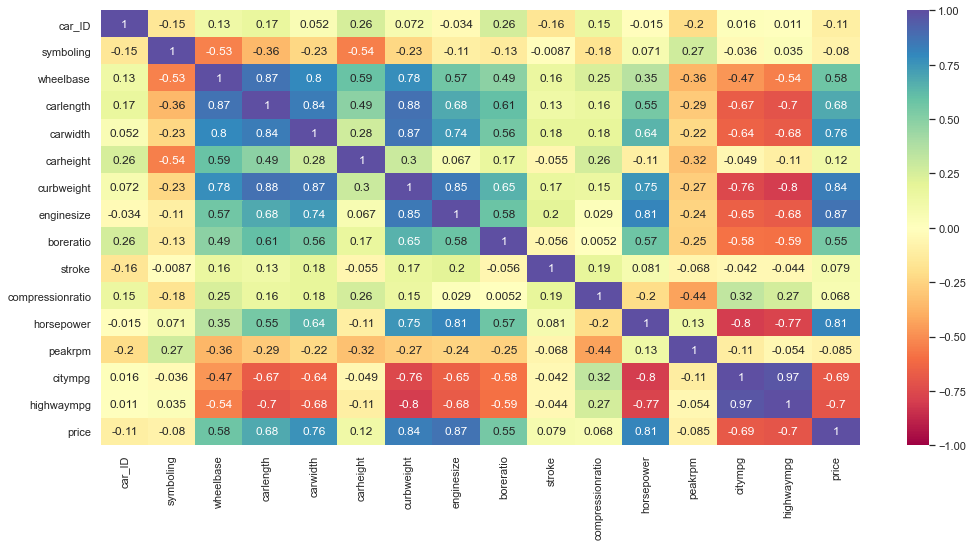

In [13]:
# проверка на наличие корреляции между элементами DataFrame
new_data = df._get_numeric_data()
sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(new_data.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

На схеме видно, что наибольшая корреляция наблюдается между элементами Price (цена) и Enginesize (размер двигателя). <br>
Отсюда будет произведен процесс построения простой линейной регрессии где зависимой переменной будет цена за автомобиль, а независимой переменной выступит размер двигателя.

<AxesSubplot:xlabel='enginesize', ylabel='price'>

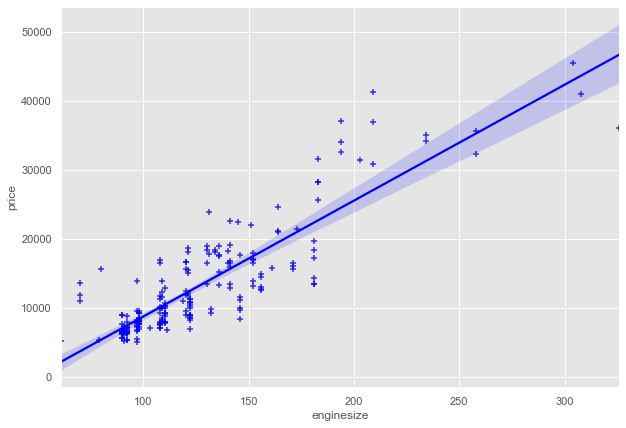

In [14]:
# визуальное построение регрессии
mpl.style.use('ggplot')
plt.figure(figsize=(10,7))
sns.regplot(y='price', x='enginesize', color='blue', marker='+', data=df)

На графике можно наблюдать положительную корреляцию между ценой и размером двигателя.

In [15]:
# построение линейной модели
lr = LinearRegression()
x = df[['enginesize']]
y = df['price']
fit = lr.fit(x,y)
yhat = lr.predict(x)

r2 = lr.score(x, y)
mse = mean_squared_error(y, yhat)

In [16]:
# оценка качества построенной модели
print('R2 = ', r2)
print('MSE = ', mse)

R2 =  0.7641291357806176
MSE =  14980261.40555132


Опираясь на значение коэффициента детерминации можно сказать, что модель хороша, но недостаточно, так как коэффициент не дотягивает хотя бы до 80%. <br>
Далее будет произведена попытка построения регрессионной модели с множеством независимых переменных для улучшения результатов.

------

In [17]:
# построение множественной линейной регрессии 
lm = LinearRegression()
X = df[['horsepower', 'curbweight', 'carwidth', 'enginesize', 'highwaympg']] 
Y = df['price']
lm.fit(X, Y)

LinearRegression()

In [18]:
# оценка качества построенной модели
Y_hat = lm.predict(X)
MSE = mean_squared_error(Y, Y_hat)
R2 = lm.score(X, Y)

print('R2 = ', R2)
print('MSE = ', MSE)

R2 =  0.8200254628202821
MSE =  11430261.30937347


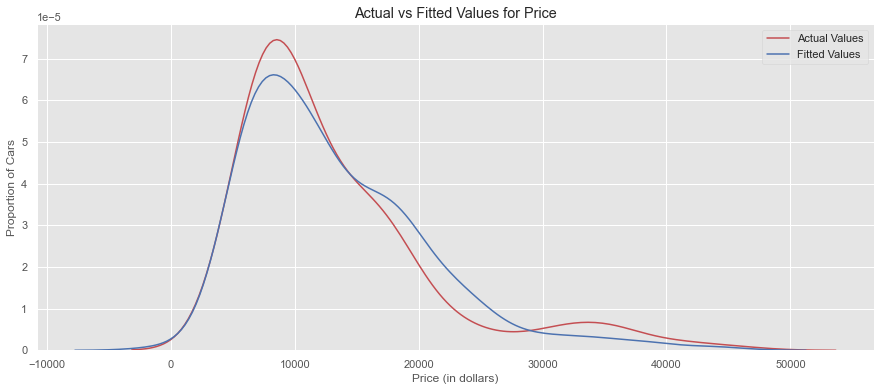

In [19]:
# визуализация полученных данных - сравнение построенной модели с реальными значениями
Y_hat = lm.predict(X)
plt.figure(figsize=(15,6))
ax1 = sns.kdeplot(df['price'],  color="r")  
sns.kdeplot(Y_hat, color="b", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
label = ['Actual Values', 'Fitted Values']
plt.legend(labels=label, loc='upper right') 

plt.show()
plt.close()

Вышеуказанная модель может быть использована для дальнейшего прогнозирования цен - так как коэффициент детерминации превышает отметку 80%, а на графике видно, что прогнозируемые значения незначительно отклоняются от реальных данных - более того среднеквадратичная ошибка заметно ниже чем у модели простой линейной регрессии. <br>
Однако, что если можно улучшить этот результат используя больше данных?

---------

In [20]:
# выделяем оставшиеся числовые данные и используем их для обучения новой модели
x_data = new_data.drop('price', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, Y, test_size=0.1, random_state=1)

In [21]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [22]:
print('R2 = ', lrm.score(x_test, y_test))

R2 =  0.8082677486291803


Коэффициент детерминации позволяет продолжить работу с данной моделью и теперь можно применить все имеющиеся данные для обучения.

In [23]:
lrm_final = LinearRegression()

lrm_final.fit(x_data,Y)
Y_HAT = lrm_final.predict(x_data)

MSE_2 = mean_squared_error(Y, Y_HAT)
R2_2 = lrm.score(x_data, Y)

print('R2 = ', R2_2)
print('MSE = ', MSE_2)

R2 =  0.8645037629690878
MSE =  8535869.69774853


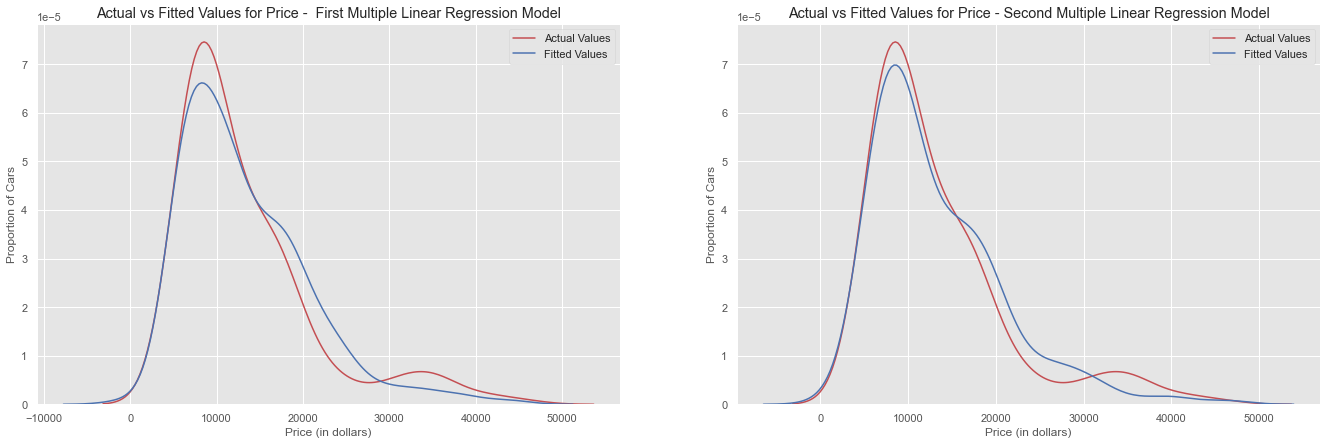

In [24]:
# сравнение двух моделей визуально
fig = plt.figure(figsize=(23,7))
plt.subplot(1, 2, 1)
ax2 = sns.kdeplot(df['price'], color="r",)
sns.kdeplot(Y_hat, color="b",  legend=True, ax=ax2)


plt.title('Actual vs Fitted Values for Price -  First Multiple Linear Regression Model')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
label = ['Actual Values', 'Fitted Values']
plt.legend(labels=label, loc='upper right') 

# subplot
plt.subplot(1, 2, 2)
ax3 = sns.kdeplot(df['price'], color="r")  
sns.kdeplot(Y_HAT, color="b", ax=ax3)

plt.title('Actual vs Fitted Values for Price - Second Multiple Linear Regression Model')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend(labels=label, loc='upper right') 



plt.show()
plt.close()

In [25]:
print('Simple Linear Regression Model: \n R2 = ', r2, '\n MSE = ', mse)

Simple Linear Regression Model: 
 R2 =  0.7641291357806176 
 MSE =  14980261.40555132


In [26]:
print('First Multiple Linear Regression Model: \n R2 = ', R2, '\n MSE = ', MSE)

First Multiple Linear Regression Model: 
 R2 =  0.8200254628202821 
 MSE =  11430261.30937347


In [27]:
print('Second Multiple Linear Regression Model: \n R2 = ', R2_2, '\n MSE = ', MSE_2)

Second Multiple Linear Regression Model: 
 R2 =  0.8645037629690878 
 MSE =  8535869.69774853


Вышеуказанные результаты дают понять, что наиболее эффективная модель для ценовых прогнозов автомобилей по их характеристикам является последняя модель, среднеквадратичная ошибка у данной модели минимальная в сравнении с другими, а коэффициент детерминации является самым высоким.

---------